In [113]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from sklearn.model_selection import train_test_split

from PIL import Image

import tensorflow as tf
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Reshape

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy


# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import random
random.seed(0)

### Loading data

In [3]:
data = np.load("Part 1- Train data - images.npy",allow_pickle=True)

In [4]:
data[1][0].shape

(697, 1280, 4)

### Visualization of sample image

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.48, 'y': 0.10385756676557864}, {'x': 0.7716666666666666, 'y': 0.6795252225519288}], 'imageWidth': 600, 'imageHeight': 337}]
0.29166666666666663


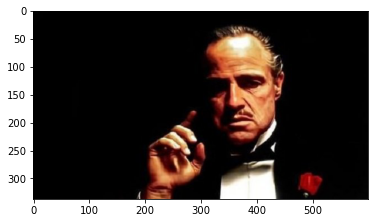

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.22545454545454546, 'y': 0.37142857142857144}, {'x': 0.49454545454545457, 'y': 0.7971428571428572}], 'imageWidth': 275, 'imageHeight': 350}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.4218181818181818, 'y': 0.5228571428571429}, {'x': 0.7527272727272727, 'y': 0.8628571428571429}], 'imageWidth': 275, 'imageHeight': 350}]
0.2690909090909091
0.3309090909090909


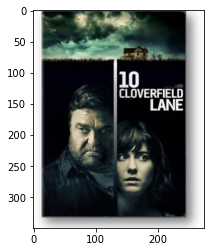

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.29516129032258065, 'y': 0.5163147792706334}, {'x': 0.4290322580645161, 'y': 0.7370441458733206}], 'imageWidth': 620, 'imageHeight': 521}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.7693548387096775, 'y': 0.6890595009596929}, {'x': 0.9, 'y': 0.8483685220729367}], 'imageWidth': 620, 'imageHeight': 521}]
0.13387096774193546
0.13064516129032255


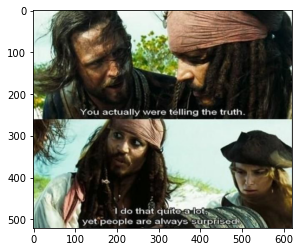

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.4084507042253521, 'y': 0.17341040462427745}, {'x': 0.5644637053087758, 'y': 0.4123314065510597}], 'imageWidth': 1280, 'imageHeight': 720}]
0.15601300108342364


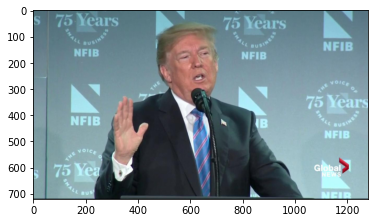

In [5]:
for i in [10,23,44,55]:    
    img,annotation_data = np.array(data[i])
    print(annotation_data)

    boundry_box = []
    for annot in annotation_data:
        imageWidth = annot["imageWidth"]
        imageHeight = annot["imageHeight"]
        print(annot["points"][1]["x"] - annot["points"][0]["x"])
        box_points = [
                     annot["points"][0]["x"]*imageWidth,
                     annot["points"][0]["y"]*imageHeight,
                     (annot["points"][1]["x"] - annot["points"][0]["x"])*imageWidth,
                     (annot["points"][1]["y"] - annot["points"][0]["y"])*imageHeight
                     ]
        boundry_box.append(box_points)

    boundry_box   


    fig, ax = plt.subplots()

    for box in boundry_box:
        # Create a Rectangle patch
        rect = Rectangle((box[0], box[1]), box[2],box[3], linewidth=2, fill=False,color="red")

        # Add the patch to the Axes
        
        

    plt.imshow(img)
    plt.show()
    

In [6]:
# Checking number of labels for each annotation data
lables_count = []
for x,anot in data:
    for anot_iter in anot:
        lables_count.append(len(anot_iter["label"]))
print(set(lables_count))  


# Checking number of labels for each annotation data
lables  = []
for x,anot in data:
    for anot_iter in anot:
        for  value in anot_iter["label"]:
            lables.append(value)
print("Lable images",set(lables))

{1}
Lable images {'Face'}


### preprocessing Image
 - reshape the image 
 - rescale annotation points to image size
 


In [7]:
IMAGE_SIZE  = 128

In [8]:
# plt.imshow(data[1][0])
# plt.show()
# plt.imshow(X[1].reshape(IMAGE_SIZE,IMAGE_SIZE,3))
# plt.show()


In [25]:
data[408][0].shape

(493, 656, 3)

In [121]:
X=[]
y=[]
for img,annotation_data in data: 
    
    img = Image.fromarray(img) # Read image
    img = img.resize((IMAGE_SIZE, IMAGE_SIZE)) # Resize image
    img = img.convert('RGB')    
    img = np.array(img)
    
    #print(img.shape)
    boundry_box = []
    for annot in annotation_data:
        imageWidth = annot["imageWidth"]
        imageHeight = annot["imageHeight"]
        #print(annot["points"][1]["x"] - annot["points"][0]["x"])
        box_points = [ 
                     int(annot["points"][0]["x"] * IMAGE_SIZE),
                     int(annot["points"][0]["y"]* IMAGE_SIZE),
                     int((annot["points"][1]["x"] - annot["points"][0]["x"])* (IMAGE_SIZE)),
                     int((annot["points"][1]["y"] - annot["points"][0]["y"])* (IMAGE_SIZE))
                     ]
        y.append(box_points)
        X.append(img)
        

In [122]:
X = np.array(X)
y = np.array(y , dtype=np.float32)
X.shape,y.shape

((1132, 128, 128, 3), (1132, 4))

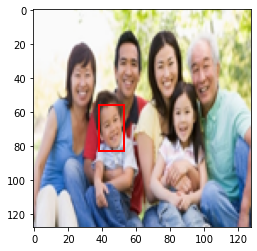

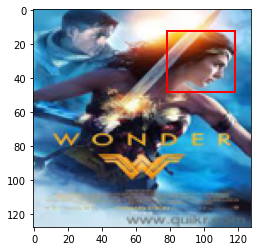

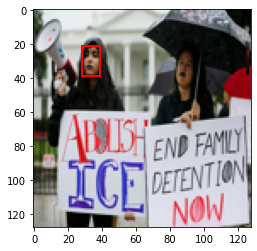

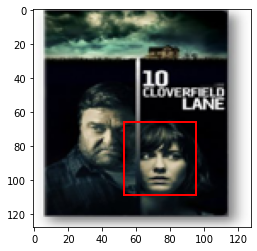

In [123]:
for i in [10,23,44,55]: 
    fig, ax = plt.subplots()
    plt.imshow(X[i])
    box = y[i]
    rect = Rectangle((box[0], box[1]), box[2],box[3], linewidth=2, fill=False,color="red")
    ax.add_patch(rect)
    plt.show()


### Train ,  Val and Test Data Split data split 

In [125]:
X_train, X_Val_test, y_train, y_Val_test = train_test_split(X,y,test_size=0.3,random_state=123)
X_val,X_test,y_val,y_test = train_test_split(X,y,test_size=0.1,random_state=123)

In [126]:
print("Train Shape - ","X--",X_train.shape," /// y -- ",y_train.shape)
print("Val Shape - ","X--",X_val.shape," /// y -- ",y_val.shape)
print("Test Shape - ","X--",X_test.shape," /// y -- ",y_test.shape)

Train Shape -  X-- (792, 128, 128, 3)  /// y --  (792, 4)
Val Shape -  X-- (1018, 128, 128, 3)  /// y --  (1018, 4)
Test Shape -  X-- (114, 128, 128, 3)  /// y --  (114, 4)


In [128]:
#y_val[0].dtype

dtype('float32')

### Model Buiding

#### Mobile Net

In [135]:
# Image processing for Mobile net

from tensorflow.keras.applications.mobilenet import preprocess_input

for i, img in enumerate(X_train):
  X_train[i] = preprocess_input(np.array(img, dtype=np.float32)) 

for i, img in enumerate(X_val):
  X_val[i] = preprocess_input(np.array(img, dtype=np.float32)) 

In [ ]:
# for i in [15,23,44,55]: 
#     fig, ax = plt.subplots()
#     plt.imshow(X_train[i])
#     box = y[i]
#     rect = Rectangle((box[0], box[1]), box[2],box[3], linewidth=2, fill=False,color="red")
#     ax.add_patch(rect)
#     plt.show()


In [136]:
ALPHA = 1.0 # Width hyper parameter for MobileNet (0.25, 0.5, 0.75, 1.0). Higher width means more accurate but slower

def mobile_net(trainable=True):
    model = MobileNet(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, alpha=ALPHA) # Load pre-trained mobilenet
    # Do not include classification (top) layer

    # to freeze layers, except the new top layer, of course, which will be added below
    for layer in model.layers:
        #print(layer.name)
        layer.trainable = trainable

    # Add new top layer which is a conv layer of the same size as the previous layer so that only 4 coords of BBox can be output
    x0 = model.layers[-1].output
    x1 = Conv2D(4, kernel_size=4, name="coords")(x0)
    # In the line above kernel size should be 3 for img size 96, 4 for img size 128, 5 for img size 160 etc.
    x2 = Reshape((4,))(x1) # These are the 4 predicted coordinates of one BBox

    return Model(inputs=model.input, outputs=x2)


In [137]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tf.keras.backend.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

#### Init Model

In [167]:
model = mobile_net(False)

#optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=[dice_coefficient])

In [168]:
mobile_net_history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=10, batch_size=32, verbose=1)

Epoch 1/10
25/25 [==============================] - 19s 692ms/step - loss: -405.4245 - dice_coefficient: 63.3625 - val_loss: -496.1320 - val_dice_coefficient: 72.6842
Epoch 2/10
25/25 [==============================] - 17s 680ms/step - loss: -493.9630 - dice_coefficient: 73.7942 - val_loss: -496.1320 - val_dice_coefficient: 72.6842
Epoch 3/10
25/25 [==============================] - 17s 684ms/step - loss: -505.1293 - dice_coefficient: 74.9718 - val_loss: -496.1320 - val_dice_coefficient: 72.6842
Epoch 4/10
25/25 [==============================] - 17s 677ms/step - loss: -497.9736 - dice_coefficient: 73.9546 - val_loss: -496.1320 - val_dice_coefficient: 72.6842
Epoch 5/10
25/25 [==============================] - 17s 682ms/step - loss: -500.6709 - dice_coefficient: 74.1151 - val_loss: -496.1320 - val_dice_coefficient: 72.6842
Epoch 6/10
25/25 [==============================] - 17s 680ms/step - loss: -498.0637 - dice_coefficient: 74.4411 - val_loss: -496.1320 - val_dice_coefficient: 72.684

array([[ 56.783997, 154.28175 , 601.5578  , 226.158   ]], dtype=float32)

[14. 27.  9. 15.]
[[1060.9802   563.1882   637.4286   265.65173]]


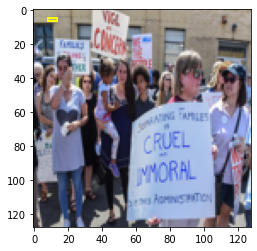

In [170]:
i =10
test_img = X_test[i]

feat_scaled = preprocess_input(np.array(test_img, dtype=np.float32))
region = model.predict(x=np.array([feat_scaled]))
print(y_test[i])
print(region)
predictedBox = region[0]

fig, ax = plt.subplots()
plt.imshow(X_test[i])
box = y_test[i]
#ax.add_patch(Rectangle((box[0], box[1]), box[2],box[3], linewidth=2, fill=False,color="red"))
ax.add_patch(Rectangle((predictedBox[0]/IMAGE_SIZE, predictedBox[1]/IMAGE_SIZE), predictedBox[2]/IMAGE_SIZE,predictedBox[3]/IMAGE_SIZE, linewidth=2, fill=False,color="yellow"))
plt.show()

500 500
Size of original input:  (128, 128, 3)
-------------------------------
Size of scaled input:  (128, 128, 3)
[893.0358  507.23596 538.6719  243.07823]
3488 1981 5592 2930


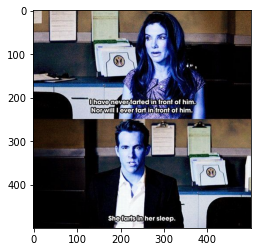

In [178]:
# Pick a test image, run model, show image, and show predicted bounding box overlaid on the image
filename = './Part 1Test Data - Prediction Image.jpeg'

unscaled = cv2.imread(filename) # Original image for display

image_height, image_width, _ = unscaled.shape
print(image_height, image_width)
image = cv2.resize(unscaled, (IMAGE_SIZE, IMAGE_SIZE)) # Rescaled image to run the network
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))
print ("Size of original input: ", image.shape)
print("-------------------------------")
print("Size of scaled input: ", feat_scaled.shape)

region = model.predict(x=np.array([feat_scaled]))# Predict the BBox
region = region[0]
print(region)

x0 = int(region[0] * image_width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[0] + region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[1] + region[3]) * image_height / IMAGE_SIZE)
print(x0,y0,x1,y1)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()